In [1]:
import json
import matplotlib.pyplot as plt
import numpy as np
import requests
import urllib
import nltk
import language_tool_python
import string
#nltk.download()
#nltk.download('punkt')
from statistics import mean, stdev
import time
import math
import statsmodels.api as sm 
from statsmodels.formula.api import ols
import pandas as pd

### stats function
def ConvertDictToDataFrame(datadict):
    #data = {'col_1': [3, 2, 1, 0], 'col_2': ['a', 'b', 'c', 'd']}    
    X = []
    Y = []
    for key in datadict.keys():
        for ele in datadict[key]:
            X.append(ele)
            Y.append(key)
        
    data = {'X': X, 'group': Y}
    df = pd.DataFrame.from_dict(data)
    return df

def outputIconForStats(pval):
    if pval <= 0.05:
        icon = '*'
    else:
        icon = ' '
    return icon

def ComputeStats_group3(data_dict):
    df = ConvertDictToDataFrame(data_dict)
    #print(df)
    mod = ols('X ~ group', data=df).fit()
    aov_table = sm.stats.anova_lm(mod, typ=2)
    
    #A one-way ANOVA revealed that there [was or was not] a statistically significant difference in [dependent variable] 
    #between at least two groups (F(between groups df, within groups df) = [F-value], p = [p-value]).
    BetweenGP_df = aov_table.df.group
    WithinGP_df = aov_table.df.Residual
    Fval = aov_table.F.group
    pval = aov_table['PR(>F)'].group
    icon = outputIconForStats(pval)
    displayStats_group3(BetweenGP_df, WithinGP_df, Fval, pval)
    return icon, BetweenGP_df, WithinGP_df, Fval, pval

def displayStats_group3(BetweenGP_df, WithinGP_df, Fval, pval):    
    print("F(" + str(BetweenGP_df) + ", " + str(WithinGP_df) + ") = " + str(Fval) +", p-val=" + str(pval))
    
    
### low level stats function

# def count_punctuations(sentence):
#     """
#     Returns the number of punctuation marks in the given sentence.
#     """
#     count = 0
#     for char in sentence:
#         if char in string.punctuation:
#             count += 1
#     return count

# def has_grammar_mistake(sentence):
#     """
#     Returns True if the sentence contains a grammar mistake, False otherwise.
#     """
#     tool = language_tool_python.LanguageTool('en-US')
#     matches = tool.check(sentence)
#     if len(matches) > 0:
#         return True
#     else:
#         return False

def runQuery(query, start_year=2020, 
             end_year=2022, corpus=26,
             smoothing=0):
  
    # converting a regular string to 
    # the standard URL format
    # eg: "geeks for,geeks" will
    # convert to "geeks%20for%2Cgeeks"
    query = urllib.parse.quote(query)
  
    # creating the URL
    #https://books.google.com/ngrams/json?content=Albert%20Einstein&year_start=1850&year_end=1860&corpus=26&smoothing=0
    url = 'https://books.google.com/ngrams/json?content=' + query + '&year_start=' + str(start_year) + '&year_end=' + str(end_year) + '&corpus=' + str(corpus) + '&smoothing=' + str(smoothing) + ''
    #print(url)
    # requesting data from the above url
    response = requests.get(url)
  
    # extracting the json data from the response we got
    output = response.json()
  
    # creating a list to store the ngram data
    return_data = []
  
    if len(output) == 0:
        # if no data returned from site,
        # print the following statement
        return "No data available for this Ngram."
    else:
        # if data returned from site,
        # store the data in return_data list
        for num in range(len(output)):
            
              # getting the name
            return_data.append((output[num]['ngram'],                                   
                                # getting ngram data
                                output[num]['timeseries']) 
                               )
  
    return return_data


# def count_words_with_capital_letters(sentence):
#     """
#     Returns the number of words in a sentence that contain at least one capital letter.
#     """
#     count = 0
#     words = sentence.split()
#     for word in words:
#         if any(c.isupper() for c in word):
#             count += 1
#     return count



# def count_word_types(sentence):
#     """
#     Returns a dictionary containing the word types and the number of words per type in a sentence.
#     """
#     words = nltk.word_tokenize(sentence)
#     tagged_words = nltk.pos_tag(words)
#     word_types = {}
#     for tagged_word in tagged_words:
#         word_type = tagged_word[1]
#         if word_type in word_types:
#             word_types[word_type] += 1
#         else:
#             word_types[word_type] = 1
#     return word_types


def outputNGRAM_Google(sentence):
    
    count = []
    for char in sentence.split(" "):
        #print(char)
        try:
            ngram = mean(runQuery(char,start_year=2010, end_year=2020, corpus=26, smoothing=0)[0][1])
            time.sleep(1)
            count.append(ngram)
        except:
            print('wrong:')
            print(char)
        
    count = mean(count)
    return count


with open('./Data_all/main_caption_data.json', 'r') as f:
    cap_data = json.load(f)

print(cap_data)



{'0001.jpg': {'human': [['a plate of sweet potatoes carrots and broccoli', 'Participant_60'], ['sweet potatoes and carrots and broccoli are laying on a white plate on top of a wooden table', 'Participant_114']], 'machine': {'ofa': 'a plate of carrots and broccoli on a table', 'clipcap': 'a plate topped with carrots and potatoes on a table', 'git': 'carrots and broccoli on a plate on a table', 'microsoft_api': 'carrots and broccoli on a plate', 'blip': 'a plate of carrots and broccoli on a table'}}, '0002.jpg': {'human': [['several watermelons on display on a table in front of a van', 'Participant_116'], ['a grouping of watermelons and bananas', 'Participant_193']], 'machine': {'ofa': 'a table filled with lots of watermelons and bananas', 'clipcap': 'a woman sitting in front of a truck full of bananas', 'git': 'a table filled with watermelons and bananas', 'microsoft_api': 'a fruit stand with bananas and other fruits', 'blip': 'a fruit stand with bananas and watermelons on it'}}, '0003.

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


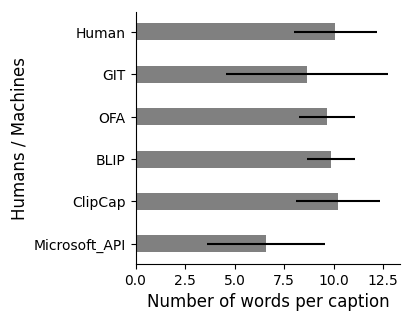

In [2]:
#number of words
count = {'human': [],
         'ofa': [], 
         'clipcap': [], 
         'git': [], 
         'microsoft_api': [], 
         'blip': []}

for image, dat in cap_data.items():
    for capp in dat['human']:
        count['human'].append(len(capp[0].split(' ')))
    count['ofa'].append(len(dat['machine']['ofa'].split(' ')))
    count['clipcap'].append(len(dat['machine']['clipcap'].split(' ')))
    count['git'].append(len(dat['machine']['git'].split(' ')))
    count['microsoft_api'].append(len(dat['machine']['microsoft_api'].split(' ')))
    count['blip'].append(len(dat['machine']['blip'].split(' ')))

    
#save the compiled results as jason
with open("./savedResults/Task1_caption_length.json", "w") as fp:
    json.dump(count,fp) 
    

# print(mean(count['ofa']))
# print(stdev(count['ofa']))
      
# print(mean(count['clipcap']))
# print(stdev(count['clipcap']))
      
# print(mean(count['git']))
# print(stdev(count['git']))
      
# print(mean(count['microsoft_api']))
# print(stdev(count['microsoft_api']))

# print(mean(count['blip']))
# print(stdev(count['blip']))

#data
#x-axis

years = list(range(1, 7))
# strtask = ['Human', 'ofa', 'git', 'clipcap', 'blip', 'microsoft_api']


strtask = ['Human', 'GIT', 'OFA', 'BLIP', 'ClipCap', 'Microsoft_API']

lengths = [mean(count['human']), mean(count['git']), mean(count['ofa']), 
           mean(count['blip']), mean(count['clipcap']), mean(count['microsoft_api'])]

lengthstd = [stdev(count['human']), stdev(count['git']), stdev(count['ofa']), 
           stdev(count['blip']), stdev(count['clipcap']), stdev(count['microsoft_api'])]

strtask.reverse()
lengths.reverse()

#print(years)
#print(strtask)

# Figure Size
fig, ax = plt.subplots()

#bar chart properties
ax.barh(strtask, lengths, color ='gray', height=0.4, xerr=lengthstd)
  
plt.ylabel('Humans / Machines', fontsize=12)
plt.xlabel('Number of words per caption', fontsize=12)
plt.xticks(rotation = 0) # Rotates X-Axis Ticks by 45-degrees
plt.xlim(left=0)
# plt.ylim(0, 1)
#plt.xlim(0.5, len(years)+0.5)

#draw chance 0.5 
# chancex =np.arange(len(years))
# plt.plot(chancex, np.arange(len(chancex))*0+0.5, 'k--', label='chance (50%)')
#plt.legend()
 
fig.tight_layout()

fig.set_figwidth(3.5)
fig.set_figheight(3)

fig.legend(loc='upper center', bbox_to_anchor=(0.55, 1.0), ncol=3, fancybox=True, shadow=True,frameon=False)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.show()
#fig.savefig('./plots/Task1_caption_length.pdf', bbox_inches='tight')
fig.savefig('./plots/Task1_caption_length.eps', format='eps', bbox_inches='tight')
fig.savefig('./plots/Task1_caption_length.png',  bbox_inches='tight')
    

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


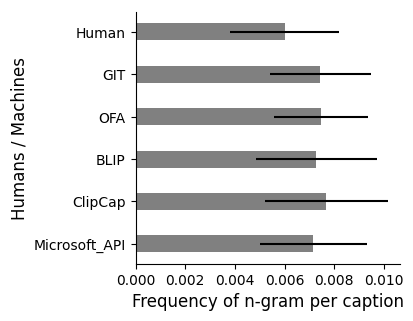

In [3]:
############# number of ngram
# query = "Albert"
# ngram_result = runQuery(query, start_year=2010, end_year=2020, corpus=26, smoothing=0)
# print(mean(ngram_result[0][1]))

writeflag = False
#change to true to re-calculate count
#it takes time (a few hours) to compute variable count

if writeflag: 
    count = {'human': [],
             'ofa': [], 
             'clipcap': [], 
             'git': [], 
             'microsoft_api': [], 
             'blip': []}

    for image, dat in cap_data.items():
        print(image)

        if int(image[:-4])%100>10:
            continue

        if int(image[:-4])%100==0:
            with open('./savedResults/Task1_caption_ngram_' + image[:-4] + '.json', "w") as fp:
                json.dump(count,fp) 

            count = {'human': [],
             'ofa': [], 
             'clipcap': [], 
             'git': [], 
             'microsoft_api': [], 
             'blip': []}

        for capp in dat['human']:
            sentence = capp[0]   
            count['human'].append(outputNGRAM_Google(sentence))

        sentence = dat['machine']['ofa']
        count['ofa'].append(outputNGRAM_Google(sentence))

        sentence = dat['machine']['clipcap']
        count['clipcap'].append(outputNGRAM_Google(sentence))
        sentence = dat['machine']['git']
        count['git'].append(outputNGRAM_Google(sentence))

        sentence = dat['machine']['microsoft_api']
        count['microsoft_api'].append(outputNGRAM_Google(sentence))

        sentence = dat['machine']['blip']
        count['blip'].append(outputNGRAM_Google(sentence))
    
else:
    
    count = {'human': [],
             'ofa': [], 
             'clipcap': [], 
             'git': [], 
             'microsoft_api': [], 
             'blip': []}
    
    #consolidate all the jason together
    for i in range(100,1100,100):
        with open('./savedResults/Task1_caption_ngram_' + str(i).zfill(4) + '.json', 'r') as f:
            CompiledResults = json.load(f)
        count['human'].extend(CompiledResults['human'])
        count['ofa'].extend(CompiledResults['ofa'])
        count['clipcap'].extend(CompiledResults['clipcap'])
        count['git'].extend(CompiledResults['git'])
        count['microsoft_api'].extend(CompiledResults['microsoft_api'])
        count['blip'].extend(CompiledResults['blip'])
    
    #print(count)
    
#data
#x-axis

years = list(range(1, 7))
# strtask = ['Human', 'ofa', 'git', 'clipcap', 'blip', 'microsoft_api']


strtask = ['Human', 'GIT', 'OFA', 'BLIP', 'ClipCap', 'Microsoft_API']

lengths = [mean(count['human']), mean(count['git']), mean(count['ofa']), 
           mean(count['blip']), mean(count['clipcap']), mean(count['microsoft_api'])]

lengthstd = [stdev(count['human']), stdev(count['git']), stdev(count['ofa']), 
           stdev(count['blip']), stdev(count['clipcap']), stdev(count['microsoft_api'])]

strtask.reverse()
lengths.reverse()

#print(years)
#print(strtask)

# Figure Size
fig, ax = plt.subplots()

#bar chart properties
ax.barh(strtask, lengths, color ='gray', height=0.4, xerr=lengthstd)
  
plt.ylabel('Humans / Machines', fontsize=12)
plt.xlabel('Frequency of n-gram per caption', fontsize=12)
plt.xticks(rotation = 0) # Rotates X-Axis Ticks by 45-degrees
plt.xlim(left=0)
# plt.ylim(0, 1)
#plt.xlim(0.5, len(years)+0.5)

#draw chance 0.5 
# chancex =np.arange(len(years))
# plt.plot(chancex, np.arange(len(chancex))*0+0.5, 'k--', label='chance (50%)')
#plt.legend()
 
fig.tight_layout()

fig.set_figwidth(3.5)
fig.set_figheight(3)

fig.legend(loc='upper center', bbox_to_anchor=(0.55, 1.0), ncol=3, fancybox=True, shadow=True,frameon=False)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.show()
#fig.savefig('./plots/Task1_caption_length.pdf', bbox_inches='tight')
fig.savefig('./plots/Task1_caption_ngram.eps', format='eps', bbox_inches='tight')
fig.savefig('./plots/Task1_caption_ngram.png',  bbox_inches='tight')



In [4]:
with open('./savedResults/Task1_caption_length.json', 'r') as f:
    count = json.load(f)

print('Task1_caption_length')
ComputeStats_group3(count)

with open('./savedResults/Task1_caption_ngram.json', 'r') as f:
    count = json.load(f)

print('Task1_caption_ngram')
ComputeStats_group3(count)




Task1_caption_length
F(5.0, 6994.0) = 313.1626412711343, p-val=1.8377762991718628e-303
Task1_caption_ngram
F(5.0, 1.0) = 35.419873959375465, p-val=0.12685212066819995


(' ', 5.0, 1.0, 35.419873959375465, 0.12685212066819995)